In [2]:
import sys
sys.path.append('/Users/saluev/Work/bioinf_homework/')

# Часть 1, датасет 1

In [4]:
! /Users/saluev/Downloads/bwa-0.7.17/bwa index /Users/saluev/Downloads/B.faecium/ref.fasta.gz

[bwa_index] Pack FASTA... 0.06 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.77 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.04 sec
[bwa_index] Construct SA from BWT and Occ... 0.73 sec
[main] Version: 0.7.17-r1188
[main] CMD: /Users/saluev/Downloads/bwa-0.7.17/bwa index /Users/saluev/Downloads/B.faecium/ref.fasta.gz
[main] Real time: 3.494 sec; CPU: 2.651 sec


In [ ]:
! /Users/saluev/Downloads/bwa-0.7.17/bwa mem -v 0 \
    /Users/saluev/Downloads/B.faecium/ref.fasta.gz \
    /Users/saluev/Downloads/B.faecium/frag*.gz \
    > /Users/saluev/Downloads/B.faecium/frag.sam

In [21]:
! /Users/saluev/Downloads/samtools-1.13/samtools flagstat /Users/saluev/Downloads/B.faecium/frag.sam

3432529 + 0 in total (QC-passed reads + QC-failed reads)
3432364 + 0 primary
0 + 0 secondary
165 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
3424657 + 0 mapped (99.77% : N/A)
3424492 + 0 primary mapped (99.77% : N/A)
3432364 + 0 paired in sequencing
1716182 + 0 read1
1716182 + 0 read2
3407384 + 0 properly paired (99.27% : N/A)
3416620 + 0 with itself and mate mapped
7872 + 0 singletons (0.23% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [22]:
! /Users/saluev/Downloads/samtools-1.13/samtools sort /Users/saluev/Downloads/B.faecium/frag.sam \
    -o /Users/saluev/Downloads/B.faecium/frag.sorted.sam

[bam_sort_core] merging from 1 files and 1 in-memory blocks...


In [24]:
! /Users/saluev/Downloads/samtools-1.13/samtools coverage /Users/saluev/Downloads/B.faecium/frag.sorted.sam

#rname	startpos	endpos	numreads	covbases	coverage	meandepth	meanbaseq	meanmapq
Contig184	1	3614991	3424657	3614991	100	130.585	56.2	59.4


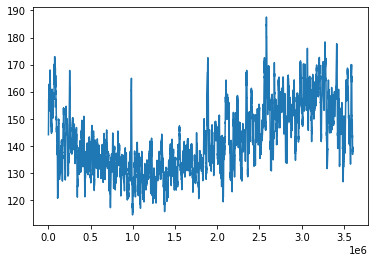

In [3]:
from ngs.ngs_2.coverage import evaluate_alignment_coverage
evaluate_alignment_coverage(
    reference="/Users/saluev/Downloads/B.faecium/ref.fasta.gz", 
    alignment="/Users/saluev/Downloads/B.faecium/frag.sorted.sam",
    window=10000,
)

In [10]:
import pandas as pd
from ngs.ngs_2.mismatch_frequency import evaluate_mismatch_frequency
stats = evaluate_mismatch_frequency(
    reference="/Users/saluev/Downloads/B.faecium/ref.fasta.gz", 
    alignment="/Users/saluev/Downloads/B.faecium/frag.sorted.sam",
)
print(f"Средний процент ошибок в ридах: {stats.avg_error_rate*100:.2f}%")
pd.DataFrame(data=[
    [stats.replacement_count[n1, n2] if n1 != n2 else "—" for n2 in "ACGT"]
    for n1 in "ACGT"
], index=list("ACGT"), columns=list("ACGT"))

Средний процент ошибок в ридах: 1.88%


,A,C,G,T
A,—,1464356,846317,104972
C,573779,—,1113628,220664
G,222038,1112636,—,575060
T,105845,840420,1477178,—


# Часть 1, датасет 2

In [ ]:
! /Users/saluev/Downloads/bwa-0.7.17/bwa mem -v 0 \
    /Users/saluev/Downloads/B.faecium/ref.fasta.gz \
    /Users/saluev/Downloads/B.faecium/jump*.gz \
    > /Users/saluev/Downloads/B.faecium/jump.sam
! /Users/saluev/Downloads/samtools-1.13/samtools flagstat /Users/saluev/Downloads/B.faecium/jump.sam
! /Users/saluev/Downloads/samtools-1.13/samtools sort /Users/saluev/Downloads/B.faecium/jump.sam \
    -o /Users/saluev/Downloads/B.faecium/jump.sorted.sam
! /Users/saluev/Downloads/samtools-1.13/samtools coverage /Users/saluev/Downloads/B.faecium/jump.sorted.sam

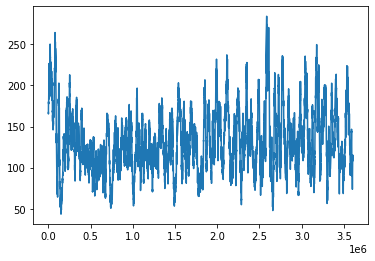

In [3]:
from ngs.ngs_2.coverage import evaluate_alignment_coverage
evaluate_alignment_coverage(
    reference="/Users/saluev/Downloads/B.faecium/ref.fasta.gz", 
    alignment="/Users/saluev/Downloads/B.faecium/jump.sorted.sam",
    window=10000,
)

In [2]:
import pandas as pd
from ngs.ngs_2.mismatch_frequency import evaluate_mismatch_frequency
stats = evaluate_mismatch_frequency(
    reference="/Users/saluev/Downloads/B.faecium/ref.fasta.gz", 
    alignment="/Users/saluev/Downloads/B.faecium/jump.sorted.sam",
)
print(f"Средний процент ошибок в ридах: {stats.avg_error_rate*100:.2f}%")
pd.DataFrame(data=[
    [stats.replacement_count[n1, n2] if n1 != n2 else "—" for n2 in "ACGT"]
    for n1 in "ACGT"
], index=list("ACGT"), columns=list("ACGT"))

Средний процент ошибок в ридах: 0.78%


,A,C,G,T
A,—,873929,515943,44330
C,144778,—,487220,75391
G,74508,480768,—,145191
T,44396,506815,887473,—


# Часть 2

In [4]:
! /Users/saluev/Downloads/bwa-0.7.17/bwa index /Users/saluev/Downloads/2b/DH10B-K12.fasta

[bwa_index] Pack FASTA... 0.06 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 2.13 seconds elapse.
[bwa_index] Update BWT... 0.04 sec
[bwa_index] Pack forward-only FASTA... 0.04 sec
[bwa_index] Construct SA from BWT and Occ... 0.75 sec
[main] Version: 0.7.17-r1188
[main] CMD: /Users/saluev/Downloads/bwa-0.7.17/bwa index /Users/saluev/Downloads/2b/DH10B-K12.fasta
[main] Real time: 3.186 sec; CPU: 3.027 sec


In [14]:
! /Users/saluev/Downloads/bwa-0.7.17/bwa mem -v 0 \
    /Users/saluev/Downloads/2b/DH10B-K12.fasta \
    /Users/saluev/Downloads/2b/B22-730.fastq.gz \
    > /Users/saluev/Downloads/2b/alignment.sam

[main] Version: 0.7.17-r1188
[main] CMD: /Users/saluev/Downloads/bwa-0.7.17/bwa mem -v 0 /Users/saluev/Downloads/2b/DH10B-K12.fasta /Users/saluev/Downloads/2b/B22-730.fastq.gz
[main] Real time: 141.518 sec; CPU: 122.683 sec


In [15]:
! /Users/saluev/Downloads/samtools-1.13/samtools sort /Users/saluev/Downloads/2b/alignment.sam \
    -o /Users/saluev/Downloads/2b/alignment.sorted.sam

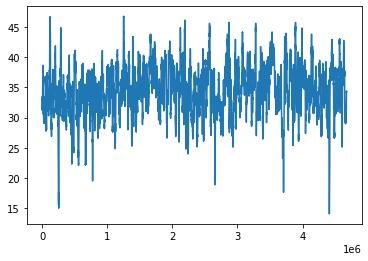

{'gi|170079663|ref|NC_010473.1|': 34.39293635825492}

In [3]:
from ngs.ngs_2.coverage import evaluate_alignment_coverage
coverage = evaluate_alignment_coverage(
    reference="/Users/saluev/Downloads/2b/DH10B-K12.fasta", 
    alignment="/Users/saluev/Downloads/2b/alignment.sorted.sam",
    window=10000,
)
coverage

In [4]:
import pandas as pd
from ngs.ngs_2.mismatch_frequency import evaluate_mismatch_frequency
stats = evaluate_mismatch_frequency(
    reference="/Users/saluev/Downloads/2b/DH10B-K12.fasta", 
    alignment="/Users/saluev/Downloads/2b/alignment.sorted.sam",
    homopolymer_length_threshold=4,
)
print(f"Средний процент ошибок в ридах: {stats.avg_error_rate*100:.2f}%")
print(f"Средняя длина вставки: {stats.avg_insertion_length:.2f}")
print(f"Средняя длина делеции: {stats.avg_deletion_length:.2f}")
print(f"Процент вставок рядом с гомополимерными участками: {stats.homopolymer_close_insertions_rate*100:.2f}%")
print(f"Среднее качество вставленного нуклеотида: {stats.avg_insertion_quality:.2f}")
print(f"Среднее качество заменённого нуклеотида: {stats.avg_mismatch_quality:.2f}")
pd.DataFrame(data=[
    [stats.replacement_count[n1, n2] if n1 != n2 else "—" for n2 in list("ACGT") + [""]]
    for n1 in list("ACGT") + [""]
], index=list("ACGT_"), columns=list("ACGT_"))

Средний процент ошибок в ридах: 0.75%
Средняя длина вставки: 1.09
Средняя длина делеции: 1.06
Процент вставок рядом с гомополимерными участками: 18.88%
Среднее качество вставленного нуклеотида: 16.09
Среднее качество заменённого нуклеотида: 19.14


,A,C,G,T,_
A,—,9147,23657,11173,119254
C,10360,—,8092,16671,72479
G,17215,7209,—,10563,72804
T,11325,24493,9060,—,119372
_,183228,79059,79197,184506,—


In [5]:
! osascript -e beep